<a href="https://colab.research.google.com/github/larrymoralez/ML_HW_-2/blob/master/ML_HW_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import numpy as np
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()




Using TensorFlow backend.


170500096/170498071 [==============================] - 30s 0us/step


In [0]:
#split data into training and test data. Be careful to only run once or it will split data over and over again.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [3]:
#Set initial params
batch_size = 32
num_classes = 10
epochs = 40
RMS = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Convert labels to categroical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
Data_Gen = ImageDataGenerator(
  featurewise_center = False,
  samplewise_center = False,
  featurewise_std_normalization = False,
  samplewise_std_normalization = False,
  rotation_range = 90,
  horizontal_flip = True,
  vertical_flip = True)

Data_Gen.fit(x_train)

In [6]:
#Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
___________________________

In [0]:
#Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=RMS,
              metrics=['accuracy'])

In [8]:
history = model.fit_generator(Data_Gen.flow(x_train, y_train, batch_size = batch_size),
                              steps_per_epoch = len(x_train) / 32,
                              epochs = epochs, 
                              validation_data=(x_val, y_val), 
                              shuffle = True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
1250/1250 [==============================] - 250s 200ms/step - loss: 3.9944 - acc: 0.2074 - val_loss: 1.9571 - val_acc: 0.2707
Epoch 2/40
1250/1250 [==============================] - 246s 197ms/step - loss: 1.9292 - acc: 0.2904 - val_loss: 1.8153 - val_acc: 0.3304
Epoch 3/40
1250/1250 [==============================] - 245s 196ms/step - loss: 1.8526 - acc: 0.3220 - val_loss: 1.7776 - val_acc: 0.3497
Epoch 4/40
1250/1250 [==============================] - 247s 197ms/step - loss: 1.8155 - acc: 0.3361 - val_loss: 1.8276 - val_acc: 0.3444
Epoch 5/40
1250/1250 [==============================] - 243s 195ms/step - loss: 1.7868 - acc: 0.3486 - val_loss: 1.7071 - val_acc: 0.3815
Epoch 6/40
1250/1250 [==============================] - 243s 195ms/step - loss: 1.7692 - acc: 0.3592 - val_loss: 1.7879 - val_acc: 0.3623
Epoch 7/40
1250/1250 [==============================] - 244s 195ms/step - loss: 1.7553 - acc: 0.3663 - val_loss: 1.7447 - va

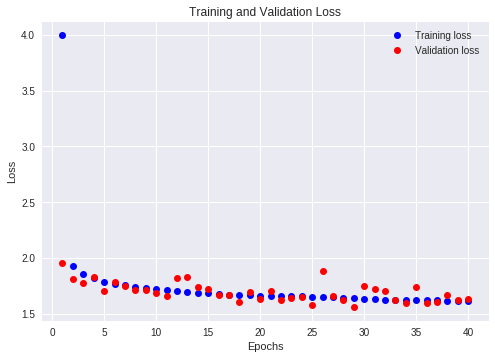

In [9]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'ro', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

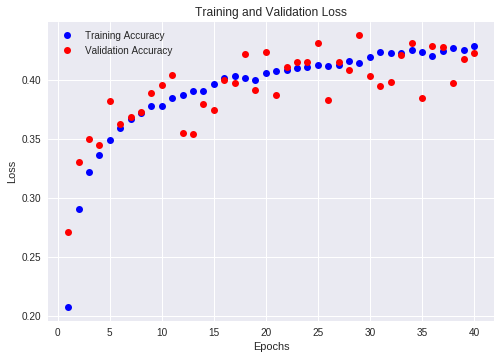

In [10]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

10000/10000 [==============================] - 17s 2ms/step
Loss: 1.6131126216888427
Accuracy: 0.4167
